<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_0612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*   기계학습은 학습에 의해 모델을 구축한 후, Test dataset을 사용하여 N-fold class-validation으로 precision, recall, f1 및 MAPE, RMSE 등 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 실측하여 알 수 없다.
*   Time-series data에 의한 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 별도의 labeling 작업을 해야 한다.
*   즉, 한번 구축한 모델은 활용 단계에서 성능을 실측하는 것이 매우 어려우며, 비즈니스상에서 IT운영팀에서 이를 관리하는 것은 현실적으로 불가능 하다.
*   하지만, 비즈니스 상에서 모델의 활용 중에 성능이 저하된다면 의사결정 및 경영상의 문제를 초래 할 수 있다.
*   하여, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔다.
*   하지만, concept drift의 측정값 (통계량)을 통해 precision, recall, accuracy 등 직접적으로 성능을 예측하는 연구는 많지 않다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision, recall, accuracy 등 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다.












# Proposed Method

1.   Feature의 importanc를 측정하는 Lime 알고리즘은 reference data를 기반으로 가상의 dataset을 임의 생성(permutation)하여 model.predict에 의한 결과 (Y)를 대조 분석하여 importance를 추정(실험의 시행에 따른 statistics에 해당) 한다.
2.   즉, dataset의 feature중 x1의 값이 변하여도 Y의 변동이 없다면 x1의 importance는 낮은 것이다. 
3.   실험 dataset에서 X1의 변동량 대비 Y의 변동량을 통계적으로 측정하여 importance를 추정하는 것이다.
4.  유사한 원리로 data drift  model performance (accuracy) 모델을 생성할 수 있을 것이다.
5.   즉, 전체 Trainset에서 N-fold class-validation의 개념으로 reference dataset과 inference dataset을 임의로 나누고, 
6.   reference 의 feature x1 대비 inference의 feature x1의 drift statistics 을 측정하고 (이때, x2,x3… 모든 feature의 drift statistics 이 측정될 것임) 이때의 inference dataset의 accuracy를 측정하여 y값으로 설정하고
7.   각 feature의 drift statistics 를 x로 설정하여 regressio에 의해 modeling (학습) 한다.
8.   물론, trainset 내의 분포, 범위라는 한계성을 갖지만,  직접적인 model 성능 추정이 가능할 것이다.









## PPM1 : feature의 drift statistics 로부터 직접 model의 성능을 추정한다.

In [ ]:
trainset : y=f(x)
base_score = Score of base model
scores = []
feature_drift = []
split_ratio = 0.1
for n fold:
    y_ref, y_inf, x_ref, x_inf = split(y, x, split_ratio)
    inf_score = score(y_inf, predict(x_inf))
    x_drift = drift(x, x_inf)
    scores.add(inf_score)
    feature_drift.add(x_drift)
        
perfomance_predict_model_1 = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift = drift(x, x_live)
predict_score = perfomance_predict_model_1(x_live_drift)

## PPM2 : feature의 drift statistics 로부터 base성능 대비 추정 성능의 차이를 추정한다.

In [ ]:
trainset : y=f(x)
base_score = Score of the model
base_feature_drift = The drift statistics of the feature that measured the base score 
scores = []
feature_drift = []
split_ratio = 0.1
for n fold:
    y_ref, y_inf, x_ref, x_inf = split(y, x, split_ratio)
    inf_score = score(y_inf, predict(x_inf))
    x_drift = drift(x, x_inf)
    scores.add(base_score - inf_score)
    feature_drift.add(base_feature_drift - x_drift)
        
perfomance_predict_model_2 = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift = drift(x, x_live)
predict_score = base_score - socre_predict_model_from_drift(base_feature_drift - x_live_drift)



# 실험 계획

*   Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>

* 예측 알고리즘
> Random-forest 알고리즘<BR>
> Deep-learning 알고리즘

* 실험
> 2010년 data를 기준으로 모델 학습<BR>
>2011년~2017년의 데이터를 2010년 학습데이터의 건수 (8000건) 단위로 drift 측정
모델의 예측 성능과 실 성능을 비교<BR>

* 실험의 변수
> PPM1, PPM2<BR>
> Split_ratio = 0.1, 0.3, 0.5<BR>
> 예측 알고리즘 : random_forest, deep_learning<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>Mean Absolute Error (MAE)<BR>
    >>Mean Squared Error (MSE)<BR>
    >>Root Mean Squared Error (RMSE)<BR>
    >>R-Squared<BR>
    >>Adjusted R-squared<BR>


# 데이터 준비

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

np.random.seed(1337)

In [3]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [4]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [5]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [6]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [7]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [8]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [9]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [10]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [11]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [12]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [13]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [14]:
df_accepted.shape

(1341026, 86)

In [15]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [16]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [17]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [18]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [19]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [20]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [21]:
X = {}
Y = {}

In [22]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [23]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [24]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [25]:
X[2010].shape

(11497, 81)

In [26]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [27]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

# 예측 모델 준비

In [28]:
ML = {}
scaler = MinMaxScaler()

In [30]:
MODEL_TYPE = 'RF'  ## RF / DL

## deep learning 모델

In [ ]:
import os.path 

def build_model_dl(year,x,y,epochs=5):
    #X_train, X_test, y_train, y_test = train_test_split(X[year], Y[year], test_size=0.2, random_state=42)
    X_train= scaler.fit_transform(x)
    #X_test = scaler.transform(X_test)
    y_train = get_one_hot(y,2)

    # building the model
    model = Sequential()
    model.add(Dense(units=78,activation='relu'))
    model.add(Dense(units=39,activation='relu'))
    model.add(Dense(units=19,activation='relu'))
    model.add(Dense(units=8,activation='relu'))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    weight_path = '/content/drive/MyDrive/Drift/model/ml_'+str(year)
    if os.path.exists(weight_path+'.index'):
        model.load_weights(weight_path)
        print('load weights from ',weight_path)
    else:
        model.fit(x=X_train, 
                y=y_train, 
                epochs=epochs,
                batch_size=512,
                verbose=1)
            #validation_data=(X_test, y_test), verbose=1)
        if year > 2000:
            model.save_weights(weight_path) 
            print('save weights to ',weight_path)
    return model

## random forest 모델

In [29]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [31]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

# EDA

In [32]:
y_ref, y_inf, x_ref, x_inf = train_test_split(Y[2010], X[2010], test_size=0.30, random_state=23543)
ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf,ML[2010].predict(scaler.transform(x_inf)),average='binary')

In [34]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

def ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    if ks_stat == minS:
        ks_stat = -ks_stat
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = stats.kstwobign.sf(en * abs(ks_stat))

    return ks_stat,p_value

In [35]:
# 

from scipy.stats import ks_2samp, kstest

def ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

# EDA2

In [ ]:
import math

batch_size = 10000
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017],X[2018]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017],Y[2018]))

batch = math.ceil(X2.shape[0]/batch_size)
df1 = {}
df1['precision'] = []
df1['drift_sum'] = []
for cn in COLUMNS:
    df1[f'drift_{cn}'] = []

df2 = {}
for cn in COLUMNS:
    df2[f'drift_p_{cn}'] = []

predict = ML[2010].predict
for i in range(batch):
    X3 = X2[i*batch_size:(i+1)*batch_size]
    Y3 = Y2[i*batch_size:(i+1)*batch_size]
    f1 = precision_recall_fscore_support(Y3, predict(scaler.transform(X3)),average='binary')
    X3_drift = ks_drift(x_ref,X3)
    dsum = sum(X3_drift[:,0])

    print(f"{f1[0]},{dsum}")
    df1['precision'].append(f1[0])
    df1['drift_sum'].append(dsum)
    for i, cn in enumerate(COLUMNS):
        df1[f'drift_{cn}'].append(X3_drift[i,0])
        df2[f'drift_p_{cn}'].append(X3_drift[i,0]*(1 if X3_drift[i,1] < 0.05 else 0))


df1v = pd.DataFrame(df1)
df2v = pd.DataFrame(df2)

0.9566432003575819,0.6203529514104632
0.9536858792888687,0.9779715670436189
0.9521012200632626,0.9538994159314033
0.9545193522453198,0.9986665465390833
0.9574982722874914,1.2042733316764016
0.9615690733371234,1.1775393687088358
0.9581495305960864,2.0921540449857092
0.9543038117859971,2.138715521312289
0.9547710354161967,2.390488007953273
0.9597345630412777,2.1688517087113217
0.9551274787535411,2.2895690195103766
0.9562060620029964,2.3085878712563708
0.9574419920769666,2.1878040263452236
0.9563388288800455,2.0771837579222066
0.9627279936558287,2.1607679135081397
0.9554190833617651,2.275646191127129
0.9596351197263397,2.3423322728967326
0.9575189244153203,2.426532496582578
0.9510936623667975,2.422732757549398
0.9524451939291737,2.4512586802535106
0.9532130777903044,2.406134932272897
0.9485508874410244,2.710353436063128
0.9374229000785017,2.6897442400894773
0.9319606087735004,2.6904793960482154
0.9319811743612729,2.780317236237107
0.9263051305130513,2.6593329315272762
0.9256987048398091,2

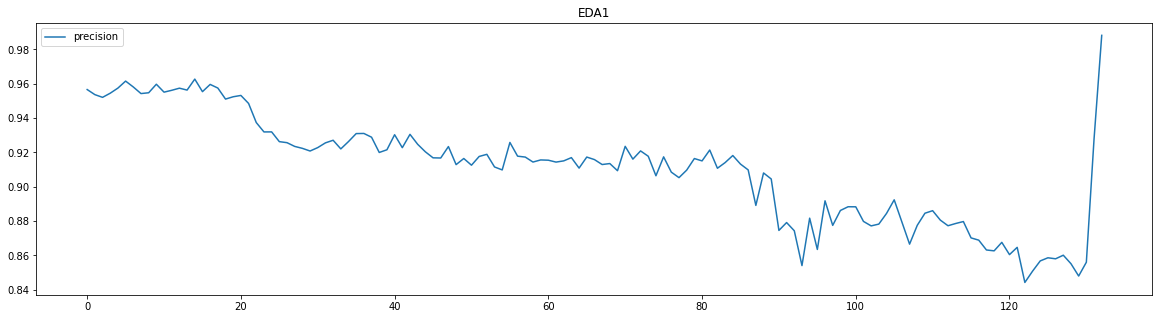

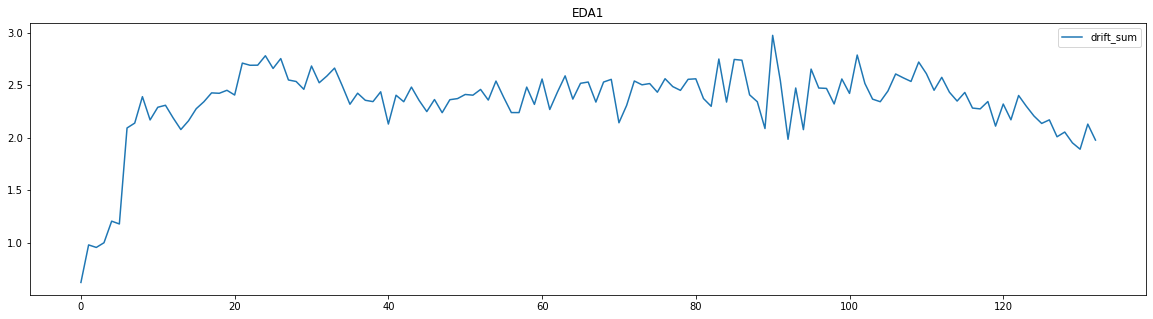

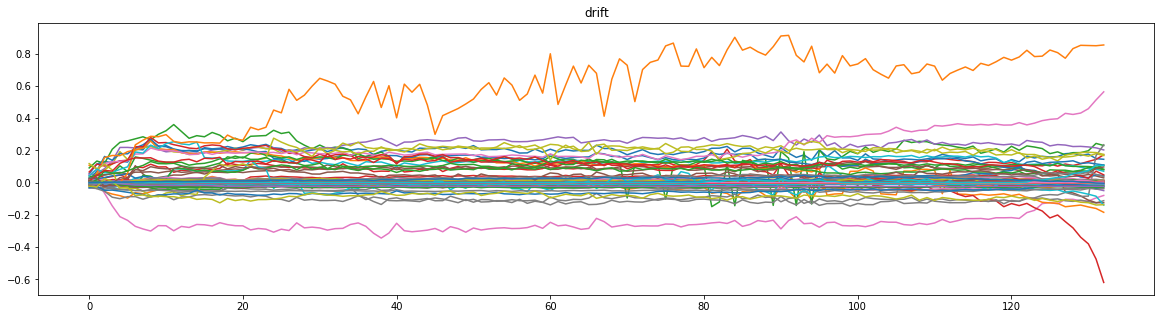

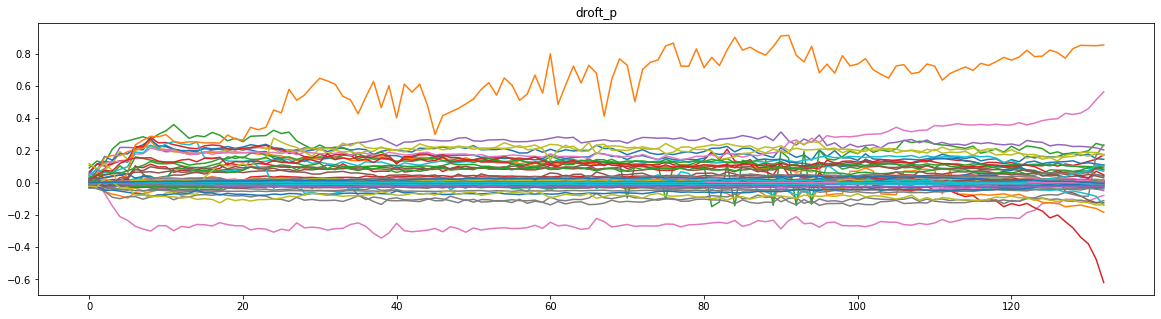

In [ ]:
df1v[['precision']].plot(title='EDA1', figsize=(20,5))
df1v[['drift_sum']].plot(title='EDA1', figsize=(20,5))
df1b = df1v.drop(columns=['precision','drift_sum'])

df1b.plot(title='drift', figsize=(20,5),legend=False)
df2v.plot(title='droft_p', figsize=(20,5),legend=False)

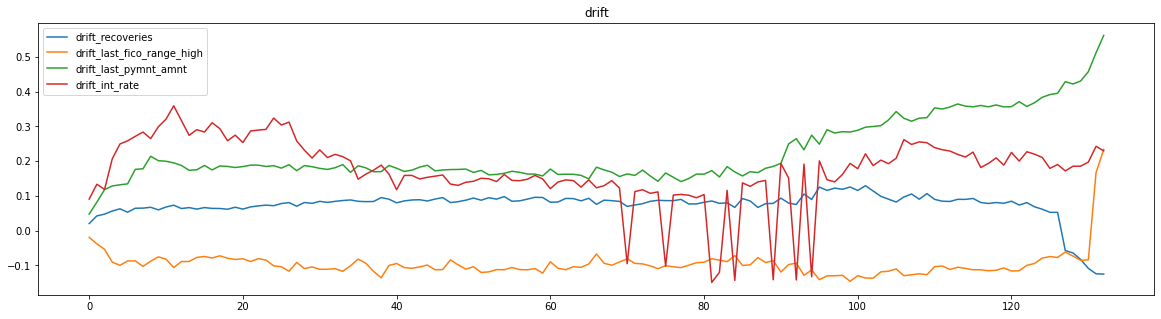

In [ ]:
df1b[['drift_recoveries','drift_last_fico_range_high','drift_last_pymnt_amnt','drift_int_rate']].plot(title='drift', figsize=(20,5))

In [ ]:
import random

df3 = {}
df3['precision'] = []
df3['drift_sum'] = []

df4 = {}
for cn in COLUMNS:
    df4[f'drift_{cn}'] = []

for i in range(1000):
    #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
    y_inf_d, _, x_inf_d, _ = train_test_split(y_inf, x_inf, train_size=random.uniform(0.05,0.95))
    acc = precision_recall_fscore_support(y_inf_d, predict(scaler.transform(x_inf_d)),average='binary')
    if base_score[0] > acc[0]:

        df3['precision'].append(acc[0])

        x_drift = ks_drift(x_ref, x_inf_d)

        
        df3['drift_sum'].append(sum(x_drift[:,0]))
        for i, cn in enumerate(COLUMNS):
            df4[f'drift_{cn}'].append(x_drift[i,0])
    
df3 = pd.DataFrame(df3)
df4 = pd.DataFrame(df4)

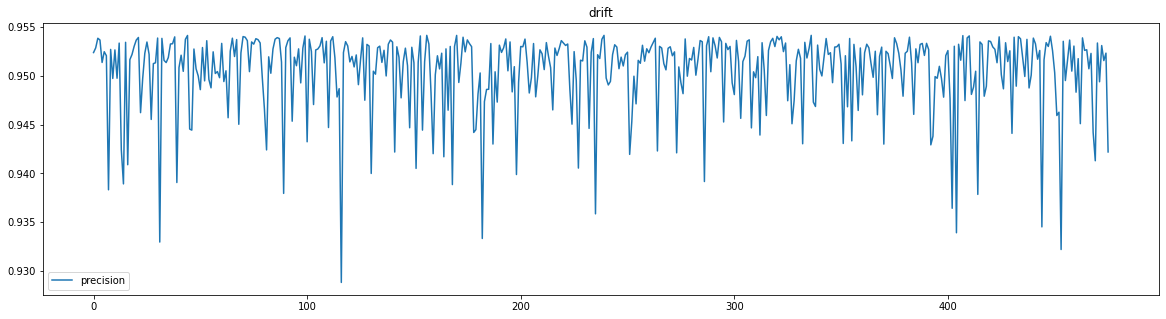

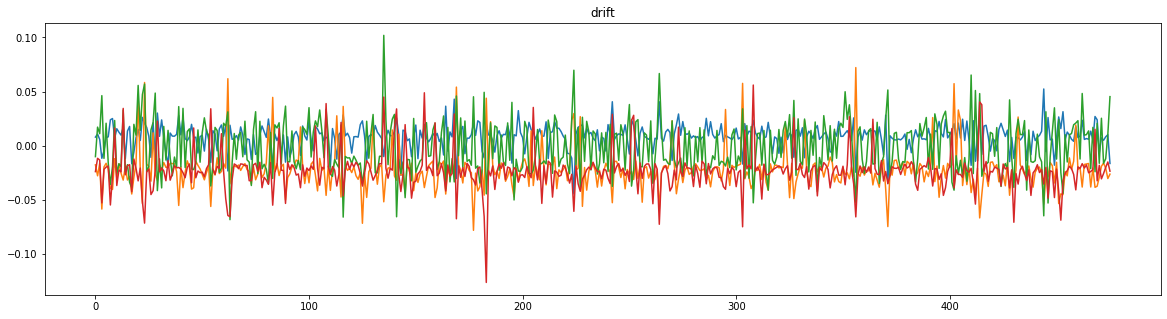

In [ ]:
#df3[['precision']][df3[['precision']] > 0.9975].plot(title='drift', figsize=(20,5))
df3[['precision']].plot(title='drift', figsize=(20,5))
#df3[['drift_sum']].plot(title='drift', figsize=(20,5))
df4[['drift_recoveries','drift_last_fico_range_high','drift_last_pymnt_amnt','drift_int_rate']].plot(title='drift', figsize=(20,5),legend=False)

# 실험

## 학습 및 기본 준비

In [57]:
y_ref, y_inf, x_ref, x_inf = train_test_split(Y[2010], X[2010], test_size=0.30, random_state=23543)

In [58]:
df_stat = pd.DataFrame({"mean":np.mean(x_inf,axis=0),"std":np.std(x_inf,axis=0)},index=COLUMNS)

In [59]:
df_stat['mean'][0]

10644.188405797102

In [60]:
ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [61]:
importances = ML[2010].feature_importances_

In [62]:
importances = importances/sum(importances)

In [63]:
l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True)    

In [64]:
def getImportanceColumnNameTop(prefix="", top=5):
    return [prefix+w for w in np.asarray(l[0:top])[:,0]]

def getImportanceIndexTop(top=5):
    return [int(w) for w in np.asarray(l[0:top])[:,2]]    

In [65]:
it = getImportanceColumnNameTop(prefix="drift_",top=5)
it

['drift_recoveries',
 'drift_last_fico_range_high',
 'drift_last_pymnt_amnt',
 'drift_total_rec_late_fee',
 'drift_int_rate']

In [66]:
x = getImportanceIndexTop(top=5)
x

[15, 17, 16, 14, 2]

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf,ML[2010].predict(scaler.transform(x_inf)),average='binary')

In [68]:
base_score

(0.9980026631158455, 1.0, 0.9990003332222593, None)

## dataset에서의 Sampling 

In [69]:
from sklearn.model_selection import train_test_split
import random

def drift_sampling2(predict,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,toplist=[]):
    metric_a= []
    metric_b= []
    metric_c= []
    drift_data_ks_stats = []
    drift_data_ks_pvals = []
    drift_data_ks_stats_diff = []
    drift_data_ks_pvals_diff = []     
    for i in range(epoch):
        #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
        y_inf_d, _, x_inf_d, _ = train_test_split(y_inf, x_inf, train_size=random.uniform(1-sampling_sigma,sampling_sigma))
        #permutation for x_inf_d
        #for v in toplist:
        v = random.choice(toplist)
        x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])
        """
        for k in range(x_inf_d.shape[0]):
            for v in toplist:
                x_inf_d[k,v] = x_inf_d[k,v] + np.random.normal(0, df_stat['std'][v]*5, 1)[0]
        """
        acc = precision_recall_fscore_support(y_inf_d, predict(scaler.transform(x_inf_d)),average='binary')
        if base_score[0] > acc[0]:
            x_drift = ks_drift(x_ref, x_inf_d)

            sumd = np.sum(x_drift[:,0])
            sump = np.sum(x_drift[:,1])
            print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f} {sump:.4f} shape:{x_ref.shape}", end="", flush=True)
            metric_a.append([acc[0]/base_score[0],acc[1]/base_score[1],acc[2]/base_score[2]])
            metric_b.append([(base_score[0] - acc[0]),(base_score[1] - acc[1]),(base_score[2] - acc[2])])
            metric_c.append([acc[0],acc[1],acc[2]])
            drift_data_ks_stats.append(x_drift[:,0])
            drift_data_ks_pvals.append(x_drift[:,1])
            #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
            #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
            drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

    metric_a = np.asarray(metric_a)
    metric_b = np.asarray(metric_b)
    metric_c = np.asarray(metric_c)        
    drift_data_ks_stats = np.asarray(drift_data_ks_stats)
    drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
    drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
    drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  

    return  metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,y_ref.shape[0]


performance predict model

In [70]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import random

random.seed(42)


In [71]:
from keras import backend as K


def r2(y_true, y_pred):
    """
    # custom R2-score metrics for keras backend
    :param y_true: 실측 데이터
    :param y_pred: 모델에 의한 예측 데이테
    :return: R^2 value, 이 값이 높다고 (예:0.99)해서 예측 값이 정확 하다고 할 수 는 없음...
    """
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [72]:
class VerboseCallback(tf.keras.callbacks.Callback):
    """
    kerase.model.fit 함수에서, log 출력을 위한 callback
    """
    def __init__(self, epoch):
        self.epoch = epoch
        self.progress("learning:", 0, [])

    def progress(self, text, current=0, log=None):
        g = self.epoch - current
        f = 50 / self.epoch
        c = int(current * f)
        pg = ['=' for i in range(c)] + ['.' for i in range(50 - c)]
        print("\r" + str(text) + "{}/{}[{}]{}".format(current, self.epoch, ''.join(pg), ('' if log is None else log)),
              end="", flush=True)
        if self.epoch - current == 0:
            print("")

    def on_epoch_end(self, epoch, logs=None):
        self.progress("learning:", epoch + 1, logs)

In [123]:
from tensorflow.keras import initializers
import random

#ss = StandardScaler()
#dx = ss.fit_transform(dx)
"""
tf.keras.layers.Dense(dx.shape[1], activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(dx.shape[1]*8, activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(dx.shape[1]*2, activation='relu',
                    kernel_initializer=initializers.RandomNormal(stddev=0.4),
                    bias_initializer=initializers.Zeros()),
#tf.keras.layers.Dropout(0.1),
"""

def train_model(epochs=600):

    seed_everything()    

    model_c = tf.keras.Sequential([
        tf.keras.layers.Dense(dx.shape[1]*10, activation='relu', input_shape=(dx.shape[1],),
                              kernel_initializer=initializers.RandomNormal(mean=-0.2, stddev=0.3),
                              bias_initializer=initializers.Zeros()),
        #tf.keras.layers.LayerNormalization(),
        #tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu',
                              kernel_initializer=initializers.RandomNormal(mean=-0.2, stddev=0.3),
                              bias_initializer=initializers.Zeros()),
        #tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Dense(1)
    ])

    # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    opt = optimizers.RMSprop(learning_rate=0.0001)
    model_c.compile(optimizer=opt,
                loss='mse',
                metrics=[r2])
    #print(model_c.summary())
    #hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, batch_size=400, epochs=epochs,shuffle=False,verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])
    hist = model_c.fit(dx, metric_c[:,0], validation_split=0.2, 
                       batch_size=1200, epochs=epochs,shuffle=False,use_multiprocessing=False,
                       verbose=0,callbacks=[early_stop,VerboseCallback(epochs)]) #, callbacks=[es_callback])

    return hist, model_c

In [75]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

In [76]:
def ensemble_train(ensemble_num=30, epochs=600, cut=0.90):
    models = []
    for i in range(ensemble_num):
        h,m = train_model(epochs)
        hist = pd.DataFrame(h.history)
        print(f"last val_r2:{hist.iloc[-1]['val_r2']}")
        if hist.iloc[-1]['val_r2'] > cut:
            models.append(m)
            df2 = predict_precision_for_PPM1([m])
            print(f"Iteration {i} ============================================================")
            result_statistics(df2)
            df2.plot(title=f'Iteration {i}', figsize=(20,5))
    return models

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def result_statistics(df2):
    MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
    MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
    MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
    RMSE = np.sqrt(MSE)
    r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
    print('MAE',MAE)
    print('RMSE',RMSE)
    print('MAPE',MAPE)
    print('R2',r_2)
    #display adjusted R-squared
    #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
    #print('adj R2',adj_r2)
    return MAE,RMSE,MAPE,r_2

## 실험1

9999/10000 acc:0.9245 0.6243 0.7453 sum:-0.3520 15.8637 shape:(8047, 81)(6535, 5)
learning:1000/1000[==================================================]{'loss': 4.2609404772520065e-05, 'r2': 0.9580639004707336, 'val_loss': 4.246813841746189e-05, 'val_r2': 0.9671937227249146}
last val_r2:0.9671937227249146
0.9963919757540771 - 0.991301417350769
0.9960778617083091 - 0.9756244421005249
0.994080213112328 - 0.95162034034729
0.9931266452179 - 0.9512335062026978
0.9917959427207638 - 0.9471685886383057
0.992724573125464 - 0.9518494606018066
0.993395949515703 - 0.953951358795166
0.990973940893871 - 0.948135256767273
0.9865684575389948 - 0.9438612461090088
0.9866259630760285 - 0.941054105758667
0.9851156069364162 - 0.9303319454193115
0.9838317355844899 - 0.9365111589431763
0.9799651567944251 - 0.9399279356002808
0.9846687879664449 - 0.9403057098388672
0.9794178182887386 - 0.9430296421051025
0.9809165823333815 - 0.9433267116546631
0.9816197587593337 - 0.9416823387145996
0.9808278867102397 - 0.942

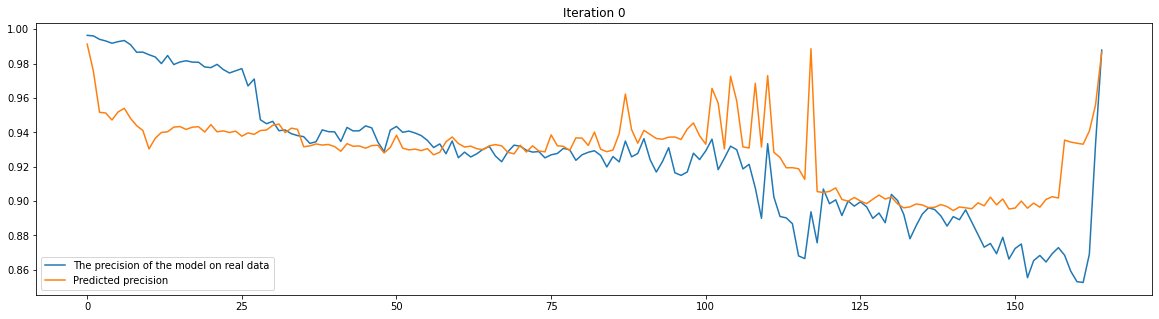

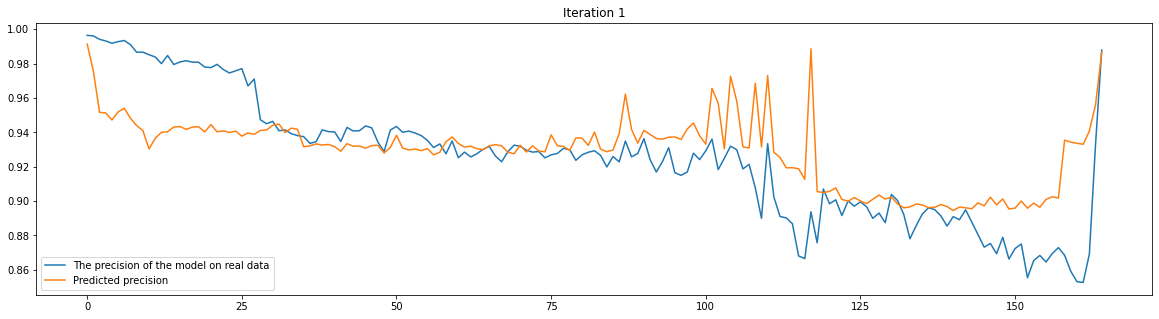

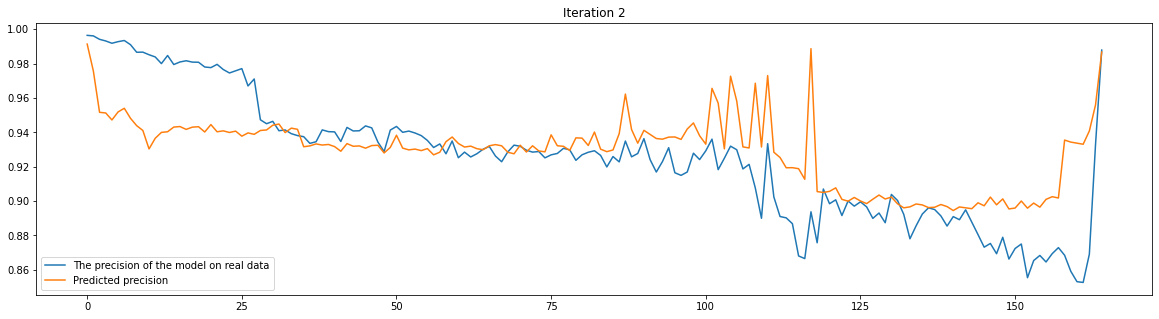

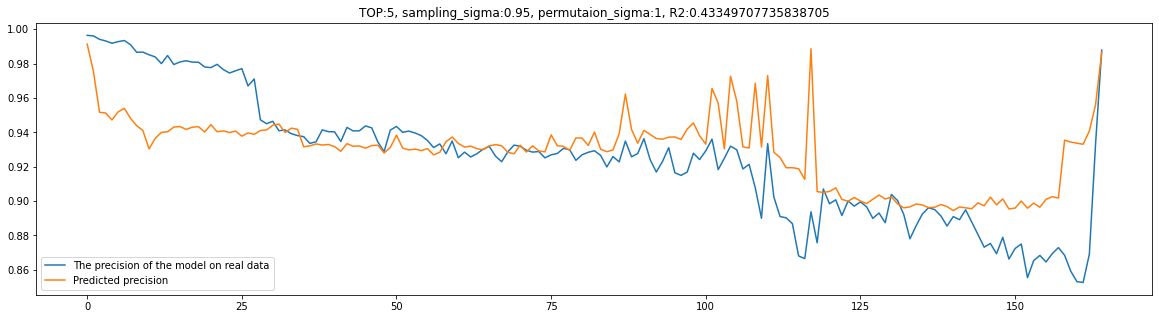

In [126]:

TOP = 5
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=3, epochs=1000)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate', 'Y', 'term', 'fico_range_high', 'total_rec_int', 'annual_inc']
9999/10000 acc:0.9977 1.0000 0.9989 sum:0.4766 19.6670 shape:(8047, 81)(5894, 10)
learning:1182/2000[=============================.....................]{'loss': 2.9982071282574907e-05, 'r2': 0.9617855548858643, 'val_loss': 5.1501447160262614e-05, 'val_r2': 0.9403365254402161}last val_r2:0.9403365254402161
0.9963919757540771 - 0.9827947020530701
0.9960778617083091 - 0.9610140919685364
0.994080213112328 - 0.9399940371513367
0.9931266452179 - 0.9069322943687439
0.9917959427207638 - 0.8722921013832092
0.992724573125464 - 0.8784536719322205
0.993395949515703 - 0.8801551461219788
0.990973940893871 - 0.8695359826087952
0.9865684575389948 - 0.8510607481002808
0.9866259630760285 - 0.8575366735458374
0.9851156069364162 - 0.8390123844146729
0.9838317355844899 - 0.8206580281257629
0.9799651567944251 - 0.827609121799469
0.9846687879664449 - 0.823

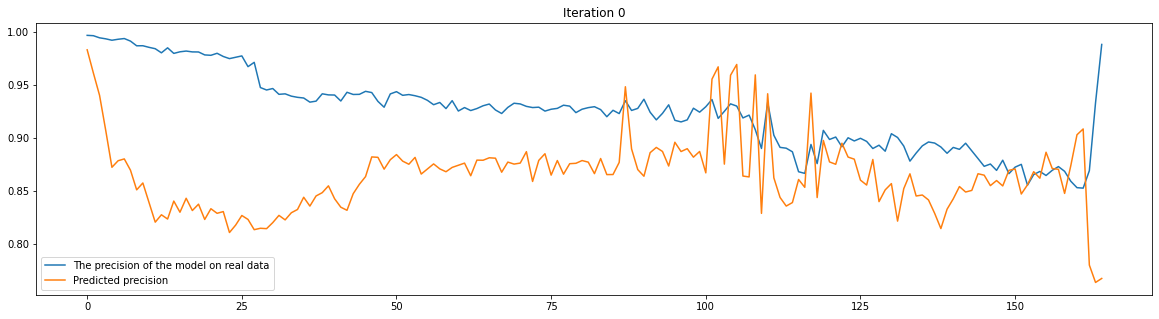

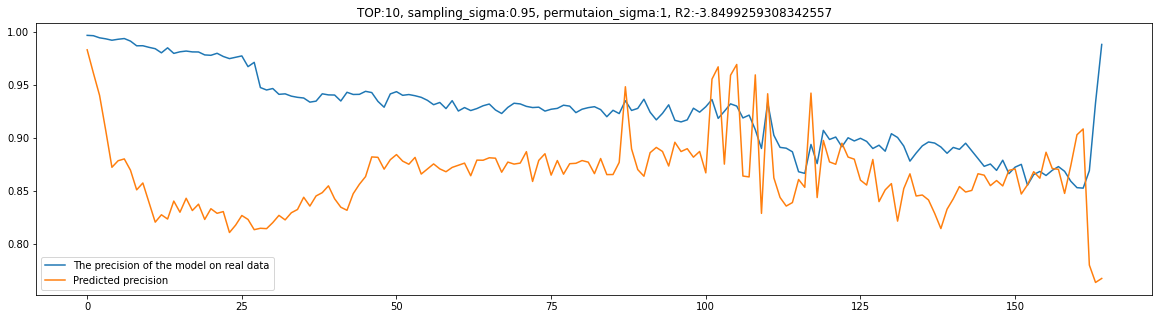

In [127]:

TOP = 10
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=2000,cut=0.80)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))


In [128]:

TOP = 30
sampling_sigma=0.95
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
print(itc)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=600)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate', 'Y', 'term', 'fico_range_high', 'total_rec_int', 'annual_inc', 'revol_util', 'loan_amnt', 'revol_bal', 'dti', 'pub_rec', 'total_acc', 'small_business', 'open_acc', 'A5', 'inq_last_6mths', 'G3', 'pub_rec_bankruptcies', 'E4', 'A4', 'E1', 'OTHER', 'A2', 'credit_card', 'A3', 'D4']
82/10000 acc:0.9977 1.0000 0.9989 sum:-0.3262 16.1148 shape:(8047, 81)

KeyboardInterrupt: ignored

9999/10000 acc:0.9626 1.0000 0.9809 sum:-0.3817 21.6096 shape:(8047, 81)(6267, 5)
learning:600/600[==================================================]{'loss': 6.234446482267231e-05, 'r2': 0.9544562101364136, 'val_loss': 6.323370325844735e-05, 'val_r2': 0.9574756026268005}
last val_r2:0.9574756026268005
0.9963919757540771 - 0.916742742061615
0.9960778617083091 - 0.9487159848213196
0.994080213112328 - 0.933675229549408
0.9931266452179 - 0.9197744131088257
0.9917959427207638 - 0.9561905264854431
0.992724573125464 - 0.9692357778549194
0.993395949515703 - 0.9824994802474976
0.990973940893871 - 0.9724461436271667
0.9865684575389948 - 0.9649493098258972
0.9866259630760285 - 0.961818516254425
0.9851156069364162 - 0.9300572276115417
0.9838317355844899 - 0.9541456699371338
0.9799651567944251 - 0.977804958820343
0.9846687879664449 - 0.9738324284553528
0.9794178182887386 - 1.0026614665985107
0.9809165823333815 - 0.9792296290397644
0.9816197587593337 - 0.9607743620872498
0.9808278867102397 - 0.9706

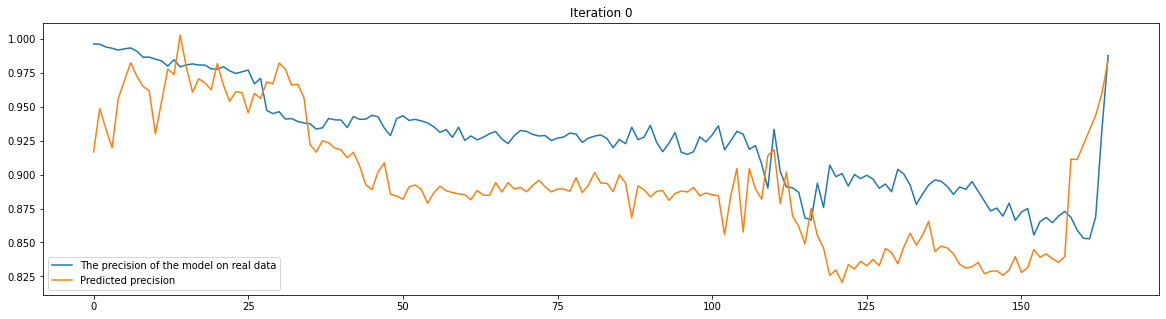

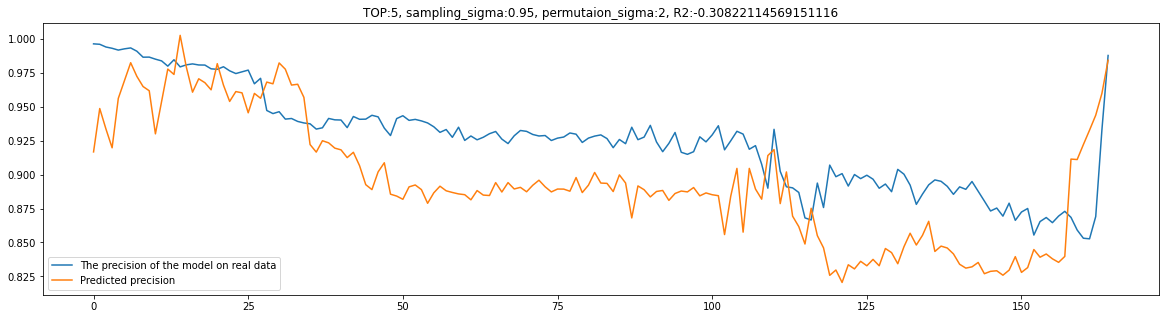

In [129]:

TOP = 5
sampling_sigma=0.95
permutaion_sigma=2

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=1000)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

9999/10000 acc:0.9977 1.0000 0.9989 sum:-0.3657 19.6670 shape:(8047, 81)(6117, 5)
learning:600/600[==================================================]{'loss': 6.165121885715052e-05, 'r2': 0.9592822790145874, 'val_loss': 6.251132435863838e-05, 'val_r2': 0.9713268280029297}
last val_r2:0.9713268280029297
0.9963919757540771 - 0.9257628321647644
0.9960778617083091 - 0.9171071648597717
0.994080213112328 - 0.9137954711914062
0.9931266452179 - 0.9052597284317017
0.9917959427207638 - 0.932271420955658
0.992724573125464 - 0.9411267638206482
0.993395949515703 - 0.9525099396705627
0.990973940893871 - 0.9413861036300659
0.9865684575389948 - 0.9317744374275208
0.9866259630760285 - 0.9271302223205566
0.9851156069364162 - 0.9050081968307495
0.9838317355844899 - 0.9187110662460327
0.9799651567944251 - 0.9404412508010864
0.9846687879664449 - 0.9375115036964417
0.9794178182887386 - 0.9672231674194336
0.9809165823333815 - 0.9435628652572632
0.9816197587593337 - 0.926138162612915
0.9808278867102397 - 0.93

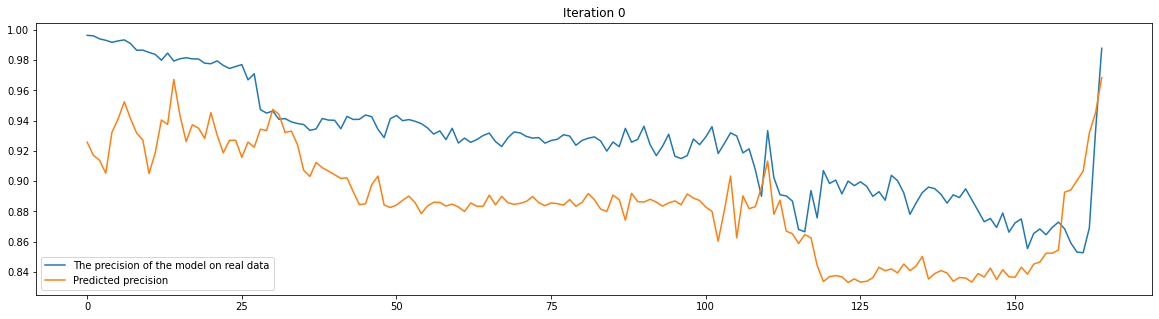

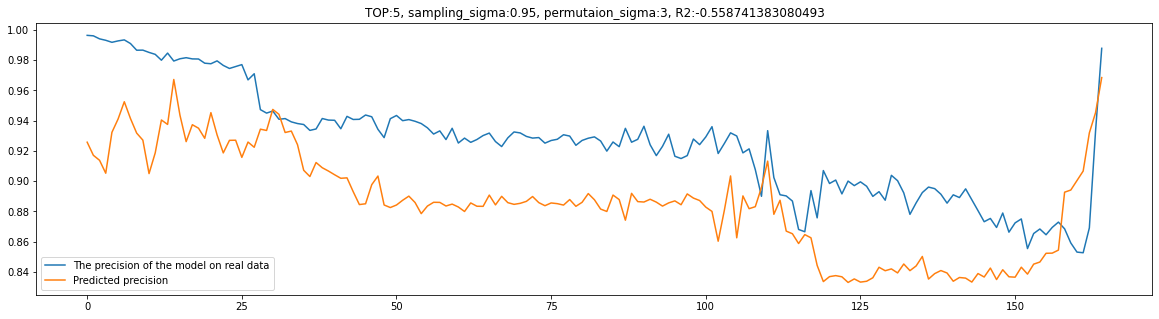

In [130]:

TOP = 5
sampling_sigma=0.95
permutaion_sigma=3

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=1000)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

10000/10000 acc:0.9965 1.0000 0.9983 sum:-0.4264 19.3301 shape:(8047, 81)(6644, 5)
learning:585/600[================================================..]{'loss': 3.4418542782077566e-05, 'r2': 0.9659282565116882, 'val_loss': 3.3880154660437256e-05, 'val_r2': 0.9672446250915527}last val_r2:0.9672446250915527
0.9963919757540771 - 0.9753031730651855
0.9960778617083091 - 0.9826363325119019
0.994080213112328 - 0.9503848552703857
0.9931266452179 - 0.9489352703094482
0.9917959427207638 - 0.9336007833480835
0.992724573125464 - 0.935329794883728
0.993395949515703 - 0.9511350393295288
0.990973940893871 - 0.9471668004989624
0.9865684575389948 - 0.93903648853302
0.9866259630760285 - 0.9370883703231812
0.9851156069364162 - 0.9152485132217407
0.9838317355844899 - 0.93873131275177
0.9799651567944251 - 0.9556266069412231
0.9846687879664449 - 0.9533283710479736
0.9794178182887386 - 0.9757388830184937
0.9809165823333815 - 0.9562972784042358
0.9816197587593337 - 0.9375633001327515
0.9808278867102397 - 0.951

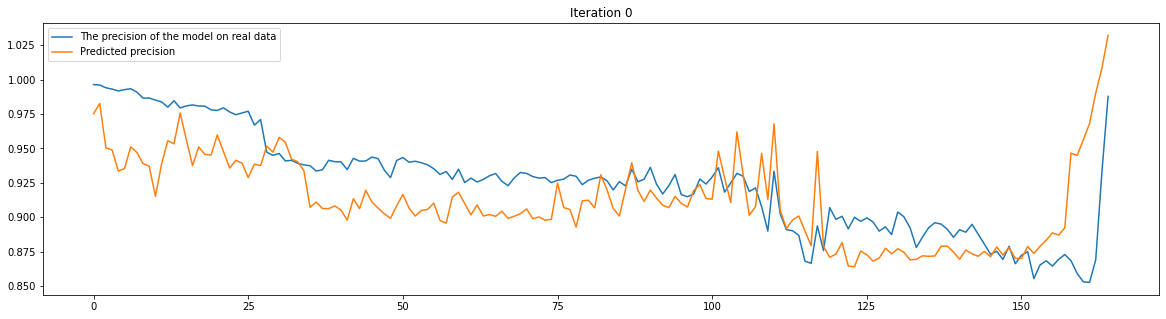

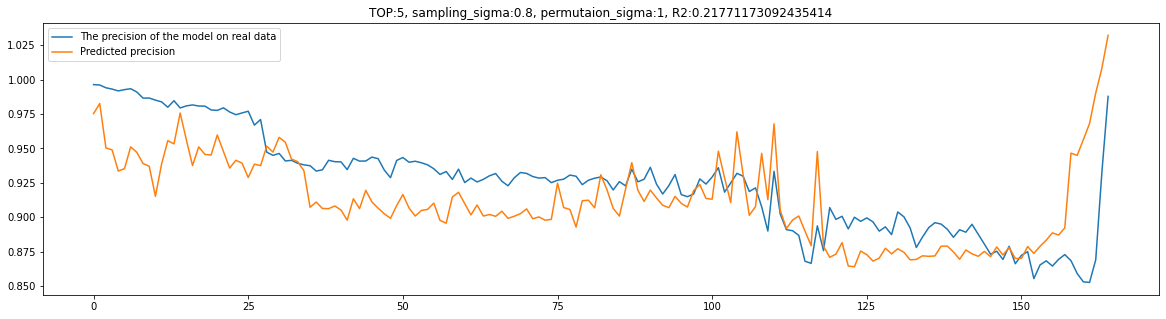

In [131]:

TOP = 5
sampling_sigma=0.80
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=1000)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))

10000/10000 acc:0.9961 1.0000 0.9981 sum:0.6762 20.4129 shape:(8047, 81)(6691, 5)
learning:600/600[==================================================]{'loss': 3.072531399084255e-05, 'r2': 0.9695064425468445, 'val_loss': 3.0774957849644125e-05, 'val_r2': 0.9709539413452148}
last val_r2:0.9709539413452148
0.9963919757540771 - 0.9782640337944031
0.9960778617083091 - 0.9803516864776611
0.994080213112328 - 0.9551362991333008
0.9931266452179 - 0.958034336566925
0.9917959427207638 - 0.93232661485672
0.992724573125464 - 0.9337853789329529
0.993395949515703 - 0.9386224746704102
0.990973940893871 - 0.9330570101737976
0.9865684575389948 - 0.9291718602180481
0.9866259630760285 - 0.9257640242576599
0.9851156069364162 - 0.9152563214302063
0.9838317355844899 - 0.922341525554657
0.9799651567944251 - 0.924681544303894
0.9846687879664449 - 0.9253543615341187
0.9794178182887386 - 0.9426788091659546
0.9809165823333815 - 0.9290037751197815
0.9816197587593337 - 0.925727367401123
0.9808278867102397 - 0.92508

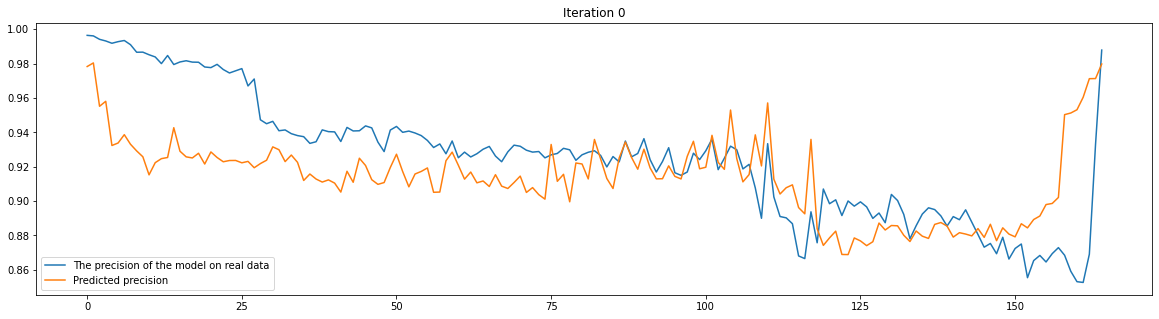

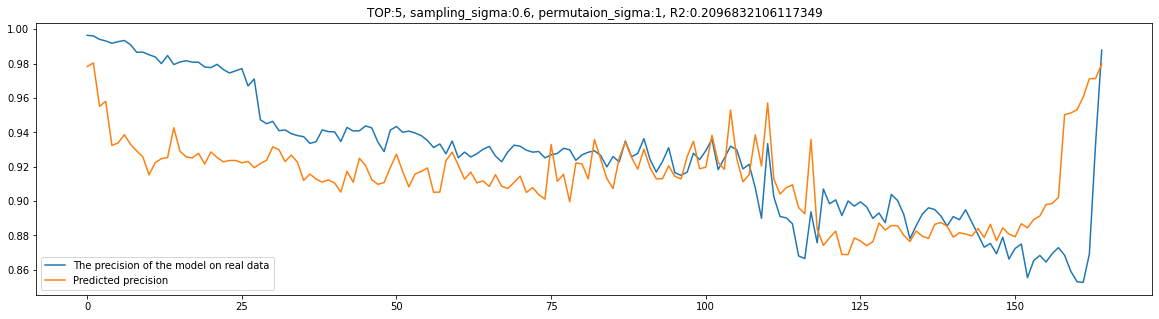

In [132]:

TOP = 5
sampling_sigma=0.60
permutaion_sigma=1

itc = getImportanceColumnNameTop(prefix="",top=TOP)
top_list = getImportanceIndexTop(top=TOP)
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling2(ML[2010].predict,sampling_sigma=sampling_sigma,permutaion_sigma=permutaion_sigma,epoch = 10000,toplist=top_list)

trainset = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=COLUMNS)
dx = trainset[itc]
print(dx.shape)

models = ensemble_train(ensemble_num=1, epochs=1000)
df2 = predict_precision_for_PPM1(models)
MAE,RMSE,MAPE,r_2 = result_statistics(df2)
df2.plot(title=f'TOP:{TOP}, sampling_sigma:{sampling_sigma}, permutaion_sigma:{permutaion_sigma}, R2:{r_2}', figsize=(20,5))